# Introduction 
> The Dataset is a set of Passwords and Its Strength from 0 to 2 . It contains one set of passwords in English of about 0.7 milion passwords , tagged acording its strength being 0 (weak) , 1 (medium) or 2 (strong) . We'll try to apply some analysis and visualization to understand our dataset and some of preprocessing techniques to prepare it for any ML Model.

> About Dataset and Probelm : https://www.kaggle.com/bhavikbb/password-strength-classifier-dataset

# Importing Libraries and Dataset

In [ ]:
pip install pandas-profiling

     |████████████████████████████████| 261 kB 6.6 MB/s 
     |████████████████████████████████| 102 kB 7.2 MB/s 
     |████████████████████████████████| 303 kB 41.3 MB/s 
  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.0.0
    Uninstalling pandas-profiling-3.0.0:
      Successfully uninstalled pandas-profiling-3.0.0


In [ ]:
# Installing Stopwords Module in NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [ ]:
df = pd.read_csv('password_data.csv',error_bad_lines=False)
df

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [ ]:
df.sample(10)

,password,strength
228622,agisuve465,1
91752,wkordvis483,1
371244,z55S0aDUwOA0kfBJ,2
141146,9ZLs7pzE1NgkCjpy,2
539863,yuda1234,1
247247,20041995a,1
311844,azBceHTIzNQa9oKu,2
577095,l9oaxwjc,1
233398,zifug655,1
495986,oduber9586,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


# Brief EDA and Visualiaztion

In [ ]:
#Checking null values in dataset
df.isnull().sum()

password    1
strength    0
dtype: int64

In [ ]:
df[df['password'].isnull()]

,password,strength
367579,NaN,0


In [ ]:
#Deleting the null value
df.dropna(inplace=True)

In [ ]:
df

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [ ]:
df.describe()

,strength
count,669639.000000
mean,0.990198
std,0.507947
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


### Getting Count of Labels

In [ ]:
df['strength'].unique()

array([1, 2, 0])

In [ ]:
df['strength'].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

In [ ]:
df.groupby('strength').describe()

password                               
            count  unique               top freq
strength                                        
0           89701   89701            joseb9    1
1          496801  496801        p4ul100890    1
2           83137   83137  gNVBFuTU3MQLW7tO    1

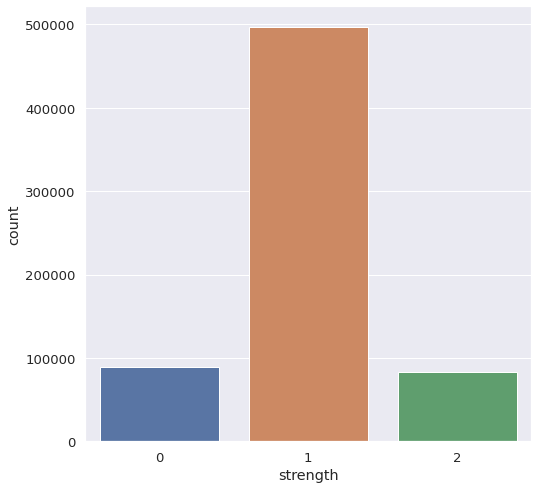

In [ ]:
sns.countplot(x= df['strength'])

### Word Cloud for Passwords 


In [ ]:
df.password

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669639, dtype: object

In [ ]:
text = " ".join(pasword for pasword in df.password)

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white',
                       height = 400,width=600).generate(text)

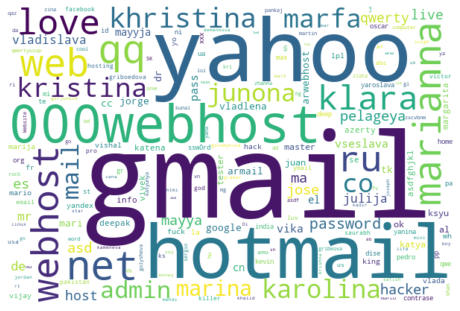

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Create New Feature To know the Password Length


In [ ]:
# Create New Feature To know the password Length
df['password length'] = df['password'].apply(len)
df['password length']

0          8
1          8
2          9
3          8
4         11
          ..
669635    10
669636     9
669637    12
669638     9
669639     8
Name: password length, Length: 669639, dtype: int64

In [ ]:
df

,password,strength,password length
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11
...,...,...,...
669635,10redtux10,1,10
669636,infrared1,1,9
669637,184520socram,1,12
669638,marken22a,1,9


In [ ]:
df.groupby('password length').describe().T

password length  1     2     3     4      5    ...  100  147  185  192  220
strength count   3.0  10.0  24.0  36.0  164.0  ...  1.0  1.0  1.0  1.0  1.0
         mean    0.0   0.0   0.0   0.0    0.0  ...  2.0  2.0  2.0  2.0  2.0
         std     0.0   0.0   0.0   0.0    0.0  ...  NaN  NaN  NaN  NaN  NaN
         min     0.0   0.0   0.0   0.0    0.0  ...  2.0  2.0  2.0  2.0  2.0
         25%     0.0   0.0   0.0   0.0    0.0  ...  2.0  2.0  2.0  2.0  2.0
         50%     0.0   0.0   0.0   0.0    0.0  ...  2.0  2.0  2.0  2.0  2.0
         75%     0.0   0.0   0.0   0.0    0.0  ...  2.0  2.0  2.0  2.0  2.0
         max     0.0   0.0   0.0   0.0    0.0  ...  2.0  2.0  2.0  2.0  2.0

[8 rows x 49 columns]

### Relation between password length and  its strenght

In [ ]:
df['password length'].value_counts()

9      144490
10     137511
8      112321
16      55638
7       49663
11      45137
6       39801
12      37330
13      20012
14      10849
15       9840
17       1787
18       1300
20       1078
19        808
21        532
22        361
23        237
24        205
5         164
25        125
30        104
26         96
27         66
28         44
4          36
29         32
3          24
2          10
32          5
40          4
1           3
45          3
36          3
31          3
34          2
35          2
50          2
64          1
185         1
147         1
100         1
68          1
192         1
48          1
39          1
37          1
33          1
220         1
Name: password length, dtype: int64

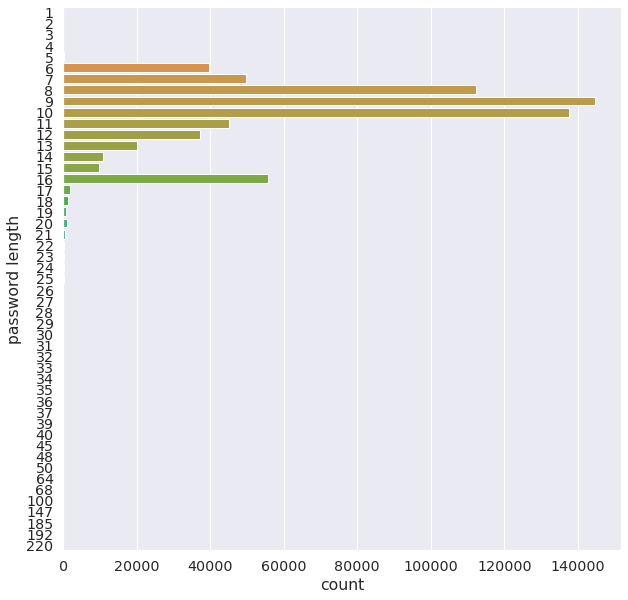

In [ ]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.countplot(y=df['password length'])

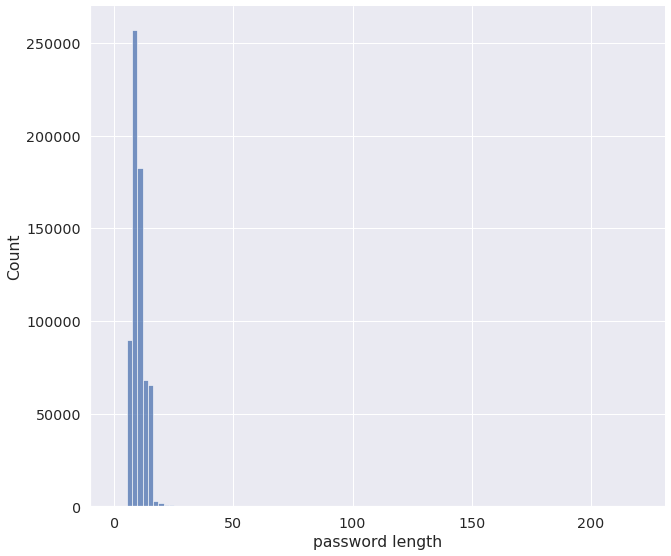

In [ ]:
sns.displot(x=df['password length'],bins=100,height=8,aspect=1.2)

Distribution in password lenght while strenght of password is 0 (weak)

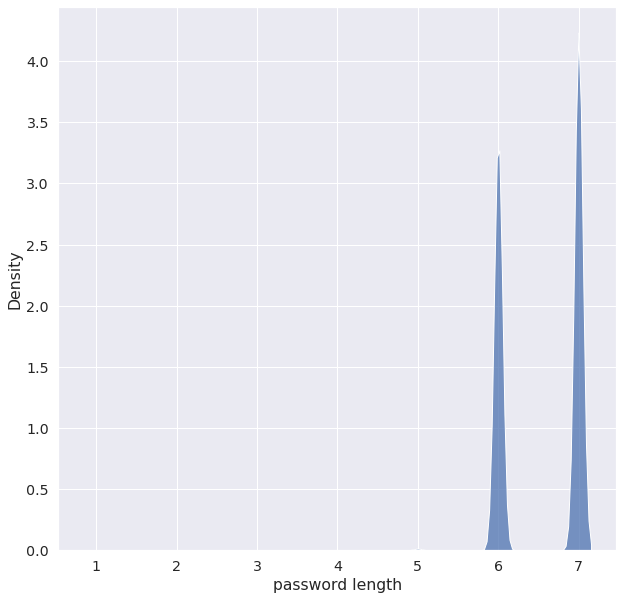

In [ ]:
sns.kdeplot( data=df['password length'][df['strength']==0],color='b',shade=True,multiple='stack')

Distribution in password lenght while strenght of password is 1 (medium)

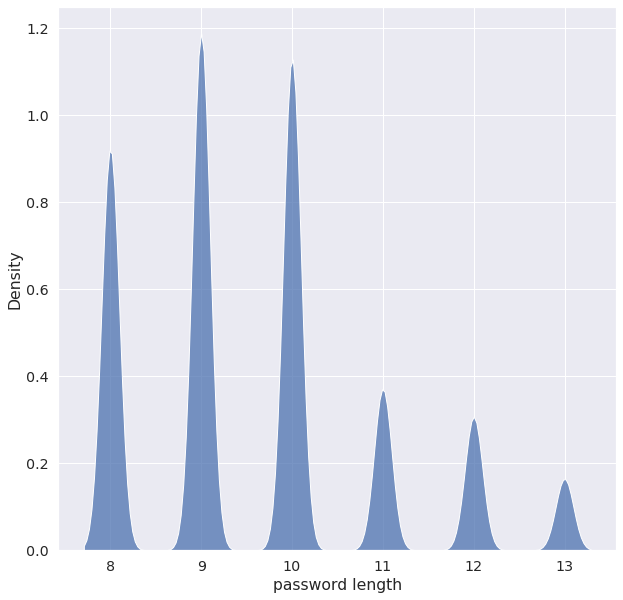

In [ ]:
sns.kdeplot( data=df['password length'][df['strength']==1],color='b',shade=True,multiple='stack')

Distribution in password lenght while strenght of password is 2 (strong)

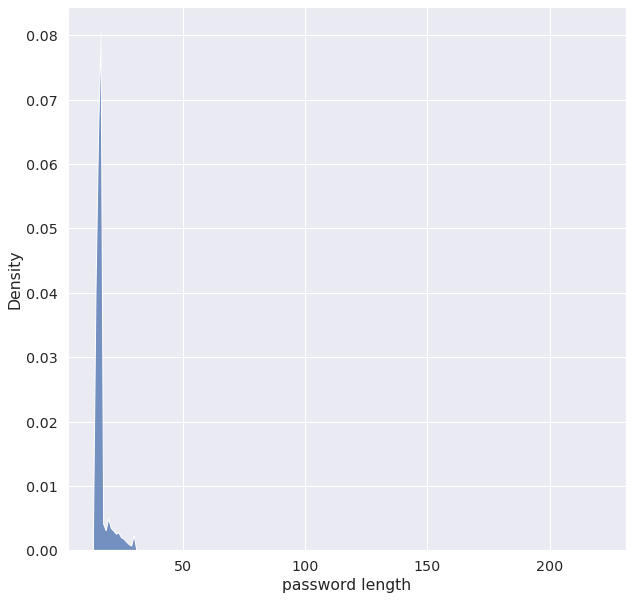

In [ ]:
sns.kdeplot( data=df['password length'][df['strength']==2],color='b',shade=True,multiple='stack')

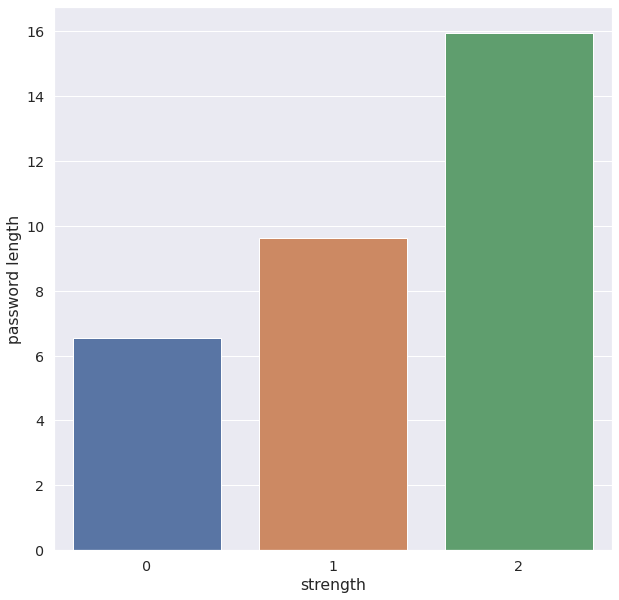

In [ ]:
# Average of password length in Case of its strength is 0 ,1 or 2
sns.barplot(x=df['strength'],y=df['password length'])

**Ok now we can say that as password length in mail increase the degree of its strength increase**

### Final Overview for the Dataset

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing

###Method for split passwords to list characters

In [ ]:
def text_process(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [ ]:
text_process('kino3434')

['k', 'i', 'n', 'o', '3', '4', '3', '4']

In [ ]:
#Checking Funtction
df['password'].apply(text_process).head(5)

0             [k, z, d, e, 5, 5, 7, 7]
1             [k, i, n, o, 3, 4, 3, 4]
2          [v, i, s, i, 7, k, 1, y, r]
3             [m, e, g, z, y, 1, 2, 3]
4    [l, a, m, b, o, r, g, h, i, n, 1]
Name: password, dtype: object

**We do this method as the single character in password it makes a difference in strenght of password**

### Shuffling 

In [ ]:
password_array = np.array(df[['password','strength']])
password_array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [ ]:
import random
random.shuffle(password_array)

In [ ]:
password_array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['kino3434', 1],
       ...,
       ['nebino1', 0],
       ['sexybamo1', 1],
       ['cpznjuga69', 1]], dtype=object)

### Splitting

In [ ]:
x = [labels[0] for labels in password_array]
y= [labels[1] for labels in password_array]
x

['kzde5577',
 'kino3434',
 'kino3434',
 'kino3434',
 'megzy123',
 'AVYq1lDE4MgAZfNt',
 'lamborghin1',
 'kino3434',
 'lamborghin1',
 'v1118714',
 'kzde5577',
 'lamborghin1',
 'megzy123',
 'u6c8vhow',
 'kino3434',
 'g067057895',
 'jerusalem393',
 'visi7k1yr',
 'g067057895',
 'WUt9IZzE0OQ7PkNE',
 'AVYq1lDE4MgAZfNt',
 'asv5o9yu',
 'klara-tershina3H',
 'visi7k1yr',
 'megzy123',
 'g067057895',
 'intel1',
 'cigicigi123',
 'intel1',
 '52558000aaa',
 'lamborghin1',
 '612035180tok',
 'sbl571017',
 'sbl571017',
 'intel1',
 'kino3434',
 '612035180tok',
 'asv5o9yu',
 'trabajonet9',
 'megzy123',
 'kzde5577',
 'exitos2009',
 'exitos2009',
 'asv5o9yu',
 'lsdlsd1',
 'megzy123',
 'memjan123',
 'lsdlsd1',
 'idofo673',
 'AVYq1lDE4MgAZfNt',
 'asgaliu11',
 'fahad123',
 'olmaz.',
 'c3h8bkzr',
 'alimagik1',
 'yk530mg8',
 'c3h8bkzr',
 'gaymaids1',
 'yitbos77',
 '612035180tok',
 'olmaz.',
 'fahad123',
 'exitos2009',
 'alimagik1',
 'calcifer32',
 'pHyqueDIyNQ8vmhb',
 'matiofox08',
 'exitos2009',
 'calcifer32',
 

In [ ]:
y

[1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
len(x_train)

535711

In [ ]:
len(x_test)

133928

### Applying TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer=TfidfVectorizer(analyzer=text_process,stop_words='english')
tfidf_transformer.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  "The parameter 'stop_words' will not be used"


TfidfVectorizer(analyzer=<function text_process at 0x7f8d69a5c3b0>,
                stop_words='english')

In [ ]:
x_train = tfidf_transformer.transform(x_train)
x_test = tfidf_transformer.transform(x_test)

In [ ]:
x_train.shape

(535711, 152)

In [ ]:
x_test.shape

(133928, 152)

# Modelling and Evalution

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
models = {
    "LR": LogisticRegression(max_iter=1000),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=70),
    "XGB": XGBClassifier(n_estimators=70),
    "Naive Bayes " : MultinomialNB()
}

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*60)

Training Model LR 
-----------------------------------------------
Training Accuracy: 0.8591162025793758
Testing Accuracy: 0.8595140672600203
Testing Confusion Matrix: 
[[ 5433 12594    39]
 [ 3889 94693   711]
 [   21  1561 14987]]
------------------------------------------------------------
Training Model DT 
-----------------------------------------------
Training Accuracy: 0.9998562657850968
Testing Accuracy: 0.9795263126456006
Testing Confusion Matrix: 
[[16921  1112    33]
 [ 1029 98050   214]
 [   65   289 16215]]
------------------------------------------------------------
Training Model RF 
-----------------------------------------------
Training Accuracy: 0.9998562657850968
Testing Accuracy: 0.9881279493459172
Testing Confusion Matrix: 
[[16955  1108     3]
 [  256 98993    44]
 [    6   173 16390]]
------------------------------------------------------------
Training Model XGB 
-----------------------------------------------
Training Accuracy: 0.9018593980709748
Testing Accu

In [ ]:
model = RandomForestClassifier(n_estimators=70)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('Frist 10 Real Outputs in Testing : \n ', y_test[:10])
print('--'*50)
print('Frist 10 Predicated Outputs in Testing : \n ', y_pred[:10])

Frist 10 Real Outputs in Testing : 
  [2, 1, 1, 1, 1, 1, 2, 0, 1, 0]
----------------------------------------------------------------------------------------------------
Frist 10 Predicated Outputs in Testing : 
  [2 1 1 1 1 1 2 0 1 0]


In [ ]:
y_compare={'y_test':y_test, 'y_predicted':y_pred}
pd.DataFrame(y_compare)

,y_test,y_predicted
0,2,2
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
133923,1,1
133924,1,1
133925,1,1
133926,1,1


In [ ]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)
print('Testing Score is : ' , model.score(x_test, y_test))

Training Score is :  0.9998375990039405
----------------------------------------------------------------------------------------------------
Testing Score is :  0.9882623499193597


In [ ]:
from sklearn.metrics import confusion_matrix
print('confusion Matrix in Testing :')  
print('--'*30)
print(confusion_matrix(y_test,y_pred))

confusion Matrix in Testing :
------------------------------------------------------------
[[16832  1080     1]
 [  278 99003    49]
 [    1   163 16521]]


In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Labels'
df_cm.columns.name = 'Predicted Labels'
df_cm

Predicted Labels,0,1,2
Actual Labels,,,
0,16832,1080,1
1,278,99003,49
2,1,163,16521


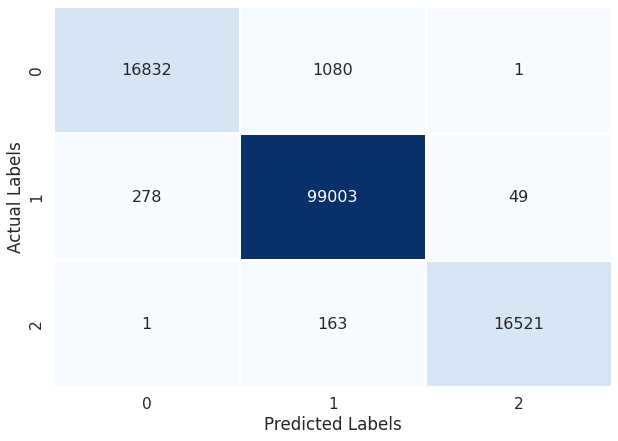

In [ ]:
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap( df_cm,cmap='Blues', annot=True,annot_kws={"size": 16},fmt='',
            linewidths=1.3,cbar=False , linecolor = 'w')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
matrix = classification_report(y_test,y_pred)
print('Classification report :')
print('--'*30)
print(matrix)


Classification report :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18066
           1       0.99      1.00      0.99     99293
           2       1.00      0.99      0.99     16569

    accuracy                           0.99    133928
   macro avg       0.99      0.97      0.98    133928
weighted avg       0.99      0.99      0.99    133928

